# Table of Contents

* [1. Introduction ](#1)
  * [1.1 Insights & Summary](#1.1)
* [3. Univariate Analysis ](#3)
* [4. Bivariate Analysis ](#4)

<a id='1'></a>
# 1 Introduction

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

Column Profiling:

* MMMM-YY : Reporting Date (Monthly)
* Driver_ID : Unique id for drivers
* Age : Age of the driver
* Gender : Gender of the driver – Male : 0, Female: 1
* City : City Code of the driver
* Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
* Income : Monthly average Income of the driver
* Date Of Joining : Joining date for the driver
* LastWorkingDate : Last date of working for the driver
* Joining Designation : Designation of the driver at the time of joining
* Grade : Grade of the driver at the time of reporting
* Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
* Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer

sns.set_style("whitegrid")

In [ ]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
!gdown 1gReJrj8m_Bm4aMa13OqwnQN2T19DiJ1O

Downloading...
From: https://drive.google.com/uc?id=1gReJrj8m_Bm4aMa13OqwnQN2T19DiJ1O
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 135MB/s]


In [ ]:
data = pd.read_csv("ola_driver_scaler.csv")

In [ ]:
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


<a id='1.1'></a>

## 1.1 Insights & Summary

* Dataset mostly has categorical variables
* Performed statistical hypothesis test based on data types to check normality, correlation and multicollinearity
* Performed nonparametric statistical tests for the features which are not normally distributed
* All statistical tests were performed with a 95% confidence level (i.e., p value < 0.05)

In [ ]:
# Dropping unuseful columns
df = data.drop(columns='Unnamed: 0')

# Replacing " " in column names with "_" and converting to lowercase
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# Changing column name
df = df.rename(columns={"mmm-yy":"reporting_date"})
df.head()

,reporting_date,driver_id,age,gender,city,education_level,income,dateofjoining,lastworkingdate,joining_designation,grade,total_business_value,quarterly_rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.dtypes

reporting_date           object
driver_id                 int64
age                     float64
gender                  float64
city                     object
education_level           int64
income                    int64
dateofjoining            object
lastworkingdate          object
joining_designation       int64
grade                     int64
total_business_value      int64
quarterly_rating          int64
dtype: object

In [ ]:
df.shape

(19104, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reporting_date        19104 non-null  object 
 1   driver_id             19104 non-null  int64  
 2   age                   19043 non-null  float64
 3   gender                19052 non-null  float64
 4   city                  19104 non-null  object 
 5   education_level       19104 non-null  int64  
 6   income                19104 non-null  int64  
 7   dateofjoining         19104 non-null  object 
 8   lastworkingdate       1616 non-null   object 
 9   joining_designation   19104 non-null  int64  
 10  grade                 19104 non-null  int64  
 11  total_business_value  19104 non-null  int64  
 12  quarterly_rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
# Converting type of appropriate columns to datetime

df.reporting_date = pd.to_datetime(df.reporting_date, format="%d/%m/%y")
df.lastworkingdate = pd.to_datetime(df.lastworkingdate, format="%d/%m/%y")
df.dateofjoining = pd.to_datetime(df.dateofjoining, format="%d/%m/%y")

df.dtypes

reporting_date          datetime64[ns]
driver_id                        int64
age                            float64
gender                         float64
city                            object
education_level                  int64
income                           int64
dateofjoining           datetime64[ns]
lastworkingdate         datetime64[ns]
joining_designation              int64
grade                            int64
total_business_value             int64
quarterly_rating                 int64
dtype: object

In [ ]:
# Sorting the data with driver_id and reported_date
df.sort_values(["driver_id","reporting_date"], inplace=True)

In [ ]:
#checking null values in every column of our data
(df.isnull().sum()/len(df)*100).round(2)

reporting_date           0.00
driver_id                0.00
age                      0.32
gender                   0.27
city                     0.00
education_level          0.00
income                   0.00
dateofjoining            0.00
lastworkingdate         91.54
joining_designation      0.00
grade                    0.00
total_business_value     0.00
quarterly_rating         0.00
dtype: float64

In [ ]:
## Imputing missing age and gender values using KNNImputer
imputer = KNNImputer(n_neighbors= 1)
imputed = imputer.fit_transform(df.select_dtypes([int, float]))
imputed_df = pd.DataFrame(imputed, columns=df.select_dtypes([int, float]).columns)

imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   driver_id             19104 non-null  float64
 1   age                   19104 non-null  float64
 2   gender                19104 non-null  float64
 3   education_level       19104 non-null  float64
 4   income                19104 non-null  float64
 5   joining_designation   19104 non-null  float64
 6   grade                 19104 non-null  float64
 7   total_business_value  19104 non-null  float64
 8   quarterly_rating      19104 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [ ]:
imputed_df = imputed_df.astype(int)
imputed_df

,driver_id,age,gender,education_level,income,joining_designation,grade,total_business_value,quarterly_rating
0,1,28,0,2,57387,1,1,2381060,2
1,1,28,0,2,57387,1,1,-665480,2
2,1,28,0,2,57387,1,1,0,2
3,2,31,0,2,67016,2,2,0,1
4,2,31,0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...,...
19099,2788,30,0,2,70254,2,2,740280,3
19100,2788,30,0,2,70254,2,2,448370,3
19101,2788,30,0,2,70254,2,2,0,2
19102,2788,30,0,2,70254,2,2,200420,2


In [ ]:
## Checking unique values in columns for a particular driver
unique_per_driver = df.groupby("driver_id").nunique().reset_index()
unique_per_driver.head()

,driver_id,reporting_date,age,gender,city,education_level,income,dateofjoining,lastworkingdate,joining_designation,grade,total_business_value,quarterly_rating
0,1,3,1,1,1,1,1,1,1,1,1,3,1
1,2,2,1,1,1,1,1,1,0,1,1,1,1
2,4,5,1,1,1,1,1,1,1,1,1,2,1
3,5,3,1,1,1,1,1,1,1,1,1,2,1
4,6,5,1,1,1,1,1,1,0,1,1,2,2


In [ ]:
# checking count of unique values for columns for individual drivers
columns = list(df.columns)
columns = [x for x in columns if x not in ["reporting_date", "total_business_value"]]
for col in columns[1:]:
    temp = df.groupby("driver_id").nunique().reset_index().loc[:,col].value_counts()
    temp = temp.to_frame()
    temp.rename(columns={"count":"driver_id_count"}, inplace=True)
    temp.index.name = f"unique_{col}_per_driver"
    print(f"Count of drivers having unique values of {col}")
    display(temp)
    print("-"*70)

Count of drivers having unique values of age


,age
unique_age_per_driver,
1,1295
2,810
3,276


----------------------------------------------------------------------
Count of drivers having unique values of gender


,gender
unique_gender_per_driver,
1,2381


----------------------------------------------------------------------
Count of drivers having unique values of city


,city
unique_city_per_driver,
1,2381


----------------------------------------------------------------------
Count of drivers having unique values of education_level


,education_level
unique_education_level_per_driver,
1,2381


----------------------------------------------------------------------
Count of drivers having unique values of income


,income
unique_income_per_driver,
1,2337
2,44


----------------------------------------------------------------------
Count of drivers having unique values of dateofjoining


,dateofjoining
unique_dateofjoining_per_driver,
1,2381


----------------------------------------------------------------------
Count of drivers having unique values of lastworkingdate


,lastworkingdate
unique_lastworkingdate_per_driver,
1,1616
0,765


----------------------------------------------------------------------
Count of drivers having unique values of joining_designation


,joining_designation
unique_joining_designation_per_driver,
1,2381


----------------------------------------------------------------------
Count of drivers having unique values of grade


,grade
unique_grade_per_driver,
1,2337
2,44


----------------------------------------------------------------------
Count of drivers having unique values of quarterly_rating


,quarterly_rating
unique_quarterly_rating_per_driver,
1,1277
2,657
3,356
4,91


----------------------------------------------------------------------


<div class="alert alert-block alert-info">
<h3>Observations:</h3>
    <ol>
        <li>Some drivers have 3 different age values.</li>
        <li>All individual drivers have one unique value.</li>
    </ol>
</div>

In [ ]:
# Function to check value has increased or not
def check_increasing_or_not(x):
    x = np.array(x)
    x = np.unique(x)
    if len(x) > 1 and x[-2] < x[-1] :
        return 1
    else:
        return 0

In [ ]:
increasing = df.groupby("driver_id")[["income", "quarterly_rating"]].transform(check_increasing_or_not)
df["income_increased"] = increasing.iloc[:,0]
df["quarterly_rating_increased"] = increasing.iloc[:,1]

In [ ]:
# Aggregating the rows to have one value for a driver

agg_df = df.groupby("driver_id").agg(
    reporting_date=("reporting_date", "last"),
    age=("age", "max"),
    gender=("gender", "first"),
    city=("city", "last"),
    education_level=("education_level", "last"),
    income=("income", "last"),
    dateofjoining=("dateofjoining", "last"),
    lastworkingdate=("lastworkingdate", "last"),
    joining_designation=("joining_designation", "last"),
    grade=("grade", "last"),
    total_business_value=("total_business_value", "sum"),
    last_total_business_value=("total_business_value", "last"),
    quarterly_rating=("quarterly_rating", "last"),
    income_increased=("income_increased", "last"),
    quarterly_rating_increased=("quarterly_rating_increased", "last")
).reset_index()

In [ ]:
agg_df = agg_df.astype({"age":int, "gender":int})

In [ ]:
## Creating churn column for drivers who left as value 1 and not left as 0
agg_df["churn"] = agg_df.lastworkingdate.apply(lambda x: 0 if x is pd.NaT else 1)

In [ ]:
agg_df

,driver_id,reporting_date,age,gender,city,education_level,income,dateofjoining,lastworkingdate,joining_designation,grade,total_business_value,last_total_business_value,quarterly_rating,income_increased,quarterly_rating_increased,churn
0,1,2019-01-03,28,0,C23,2,57387,2018-12-24,2019-11-03,1,1,1715580,0,2,0,0,1
1,2,2020-01-12,31,0,C7,2,67016,2020-06-11,NaT,2,2,0,0,1,0,0,0
2,4,2020-01-04,43,0,C13,2,65603,2019-07-12,2020-04-27,2,2,350000,0,1,0,0,1
3,5,2019-01-03,29,0,C9,0,46368,2019-09-01,2019-07-03,1,1,120360,0,1,0,0,1
4,6,2020-01-12,31,1,C11,1,78728,2020-07-31,NaT,3,3,1265000,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-01-12,34,0,C24,0,82815,2015-10-15,NaT,2,3,21748820,505480,4,0,1,0
2377,2785,2020-01-10,34,1,C9,0,12105,2020-08-28,2020-10-28,1,1,0,0,1,0,0,1
2378,2786,2019-01-09,45,0,C19,0,35370,2018-07-31,2019-09-22,2,2,2815090,0,1,0,1,1
2379,2787,2019-01-06,28,1,C20,2,69498,2018-07-21,2019-06-20,1,1,977830,0,1,0,1,1


In [ ]:
agg_df.describe(include="int").style.format('{:.2f}')

,driver_id,age,gender,education_level,income,joining_designation,grade,total_business_value,last_total_business_value,quarterly_rating,income_increased,quarterly_rating_increased,churn
count,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00,2381.00
mean,1397.56,33.66,0.41,1.01,59334.16,1.82,2.10,4586741.82,266769.42,1.43,0.02,0.46,0.68
std,806.16,5.98,0.49,0.82,28383.67,0.84,0.94,9127115.31,1134681.08,0.81,0.13,0.50,0.47
min,1.00,21.00,0.00,0.00,10747.00,1.00,1.00,-1385530.00,-990000.00,1.00,0.00,0.00,0.00
25%,695.00,29.00,0.00,0.00,39104.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,1400.00,33.00,0.00,1.00,55315.00,2.00,2.00,817680.00,0.00,1.00,0.00,0.00,1.00
75%,2100.00,37.00,1.00,2.00,75986.00,2.00,3.00,4173650.00,196920.00,2.00,0.00,1.00,1.00
max,2788.00,58.00,1.00,2.00,188418.00,5.00,5.00,95331060.00,33747720.00,4.00,1.00,1.00,1.00


In [ ]:
agg_df.describe(exclude="int", datetime_is_numeric=True)

,reporting_date,city,dateofjoining,lastworkingdate
count,2381,2381,2381,1616
unique,NaN,29,NaN,NaN
top,NaN,C20,NaN,NaN
freq,NaN,152,NaN,NaN
mean,2019-09-02 22:19:36.312473856,NaN,2019-01-27 12:58:58.009239808,2019-12-26 23:22:34.455445760
min,2019-01-01 00:00:00,NaN,2013-01-04 00:00:00,2018-12-31 00:00:00
25%,2019-01-09 00:00:00,NaN,2018-06-26 00:00:00,2019-06-10 00:00:00
50%,2020-01-06 00:00:00,NaN,2019-06-23 00:00:00,2019-12-20 12:00:00
75%,2020-01-12 00:00:00,NaN,2020-04-14 00:00:00,2020-07-14 00:00:00
max,2020-01-12 00:00:00,NaN,2020-12-28 00:00:00,2020-12-28 00:00:00


<a id='3'></a>
## 3 Univariate Analysis

In [ ]:
data = agg_df.copy()

category_cols = {col: "category" for col in [
    "gender",
    "city",
    "education_level",
    "joining_designation",
    "grade",
    "quarterly_rating",
    "income_increased",
    "quarterly_rating_increased",
    "churn"
    ]}
data = data.astype({col: "category" for col in category_cols})

In [ ]:
data.dtypes

driver_id                              int64
reporting_date                datetime64[ns]
age                                    int64
gender                              category
city                                category
education_level                     category
income                                 int64
dateofjoining                 datetime64[ns]
lastworkingdate               datetime64[ns]
joining_designation                 category
grade                               category
total_business_value                   int64
last_total_business_value              int64
quarterly_rating                    category
income_increased                    category
quarterly_rating_increased          category
churn                               category
dtype: object

In [ ]:
data.select_dtypes(include='int').iloc[:,1:]

,age,income,total_business_value,last_total_business_value
0,28,57387,1715580,0
1,31,67016,0,0
2,43,65603,350000,0
3,29,46368,120360,0
4,31,78728,1265000,0
...,...,...,...,...
2376,34,82815,21748820,505480
2377,34,12105,0,0
2378,45,35370,2815090,0
2379,28,69498,977830,0


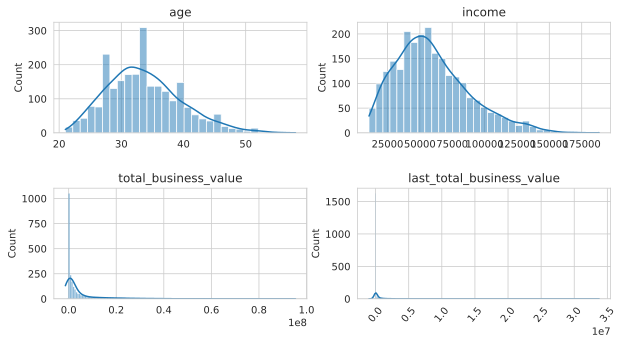

In [ ]:
## histograms and boxplot for numerical columns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(data.select_dtypes(include='int').iloc[:,1:], axs.ravel()):
    sns.histplot(data, x=i, kde=True, ax=ax)
    ax.set_title(i)
    ax.set_xlabel('')
    plt.xticks(rotation=50)

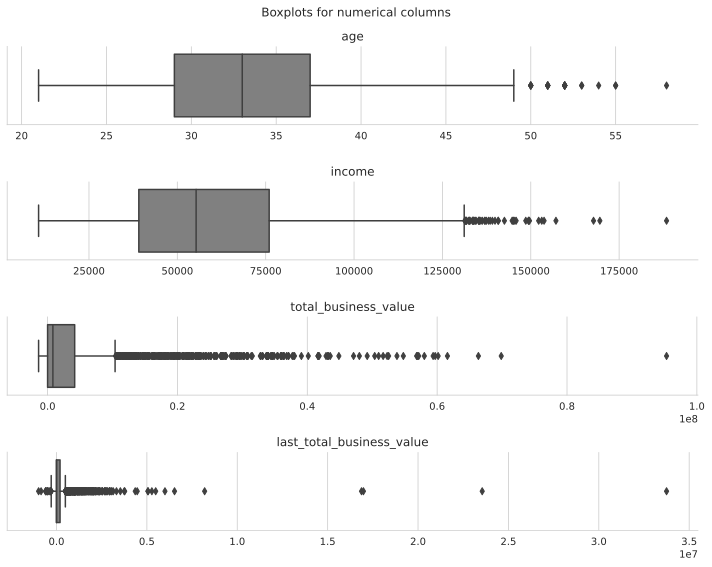

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("Boxplots for numerical columns")

for i, ax in zip(data.select_dtypes(include="int").iloc[:,1:], axs.ravel()):
    sns.boxplot(x=data[i], ax=ax, boxprops={'facecolor': 'grey'})
    sns.despine()
    ax.set_title(i)
    ax.set_xlabel("")

fig.tight_layout()

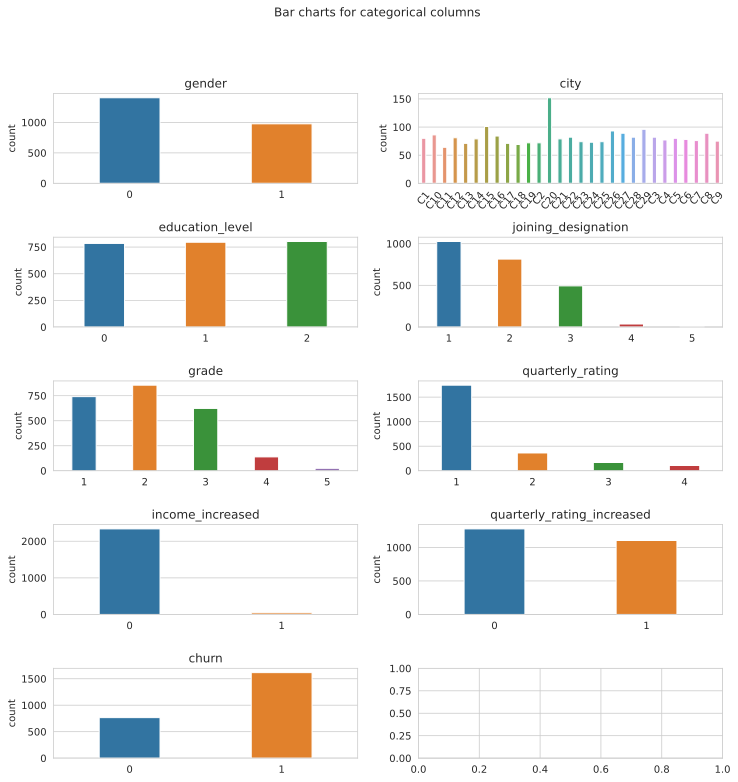

In [ ]:
## count plots for category columns

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("Bar charts for categorical columns")

for col, ax in zip(data.select_dtypes(['category']), axs.ravel()):
    sns.countplot(x=data[col], width=.4, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')

    if col == "city": ax.set_xticklabels(ax.get_xticklabels(), rotation = 50)


<Axes: xlabel='dateofjoining', ylabel='Count'>

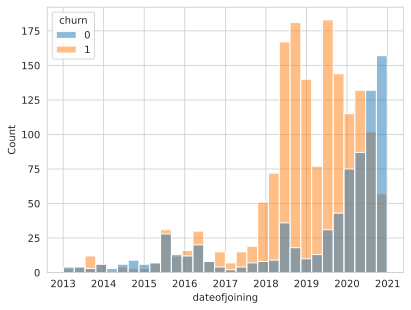

In [ ]:
sns.histplot(data, x="dateofjoining", hue="churn")

<Axes: xlabel='lastworkingdate', ylabel='Count'>

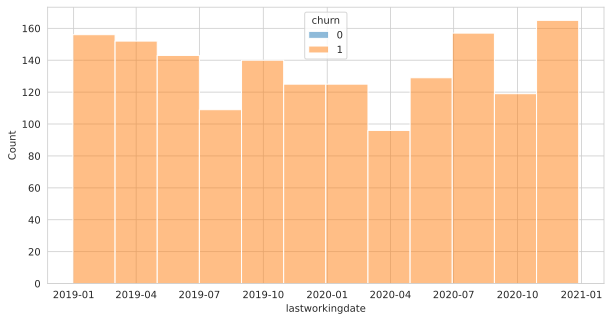

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data, x="lastworkingdate", hue="churn")

In [ ]:
data["dateofjoining_ordinal"] = data.dateofjoining.apply(lambda date: date.toordinal())
data["reporting_date_ordinal"] = data.reporting_date.apply(lambda date: date.toordinal())

data

,driver_id,reporting_date,age,gender,city,education_level,income,dateofjoining,lastworkingdate,joining_designation,grade,total_business_value,last_total_business_value,quarterly_rating,income_increased,quarterly_rating_increased,churn,dateofjoining_ordinal,reporting_date_ordinal
0,1,2019-01-03,28,0,C23,2,57387,2018-12-24,2019-11-03,1,1,1715580,0,2,0,0,1,737052,737062
1,2,2020-01-12,31,0,C7,2,67016,2020-06-11,NaT,2,2,0,0,1,0,0,0,737587,737436
2,4,2020-01-04,43,0,C13,2,65603,2019-07-12,2020-04-27,2,2,350000,0,1,0,0,1,737252,737428
3,5,2019-01-03,29,0,C9,0,46368,2019-09-01,2019-07-03,1,1,120360,0,1,0,0,1,737303,737062
4,6,2020-01-12,31,1,C11,1,78728,2020-07-31,NaT,3,3,1265000,0,2,0,1,0,737637,737436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-01-12,34,0,C24,0,82815,2015-10-15,NaT,2,3,21748820,505480,4,0,1,0,735886,737436
2377,2785,2020-01-10,34,1,C9,0,12105,2020-08-28,2020-10-28,1,1,0,0,1,0,0,1,737665,737434
2378,2786,2019-01-09,45,0,C19,0,35370,2018-07-31,2019-09-22,2,2,2815090,0,1,0,1,1,736906,737068
2379,2787,2019-01-06,28,1,C20,2,69498,2018-07-21,2019-06-20,1,1,977830,0,1,0,1,1,736896,737065


<Axes: xlabel='total_business_value', ylabel='Count'>

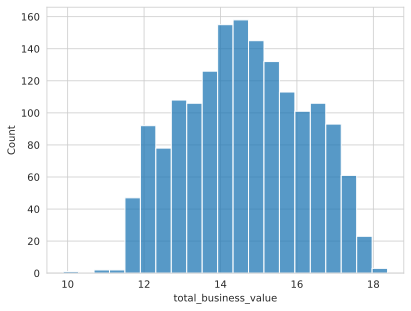

In [ ]:
sns.histplot(x=np.log(data[data.total_business_value>0].total_business_value))

<Axes: xlabel='last_total_business_value', ylabel='Count'>

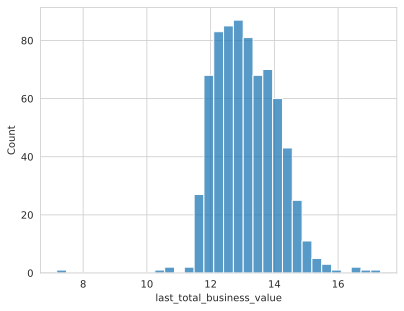

In [ ]:
sns.histplot(x=np.log(data[data.last_total_business_value>0].last_total_business_value))

<Axes: xlabel='count', ylabel='reporting_date'>

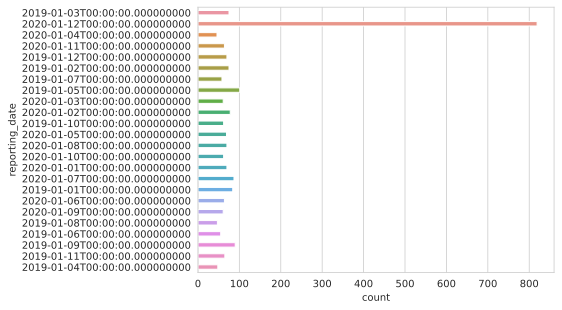

In [ ]:
sns.countplot(data,y="reporting_date", width=.4)

<a id='4'></a>
## 4 Bivariate Analysis

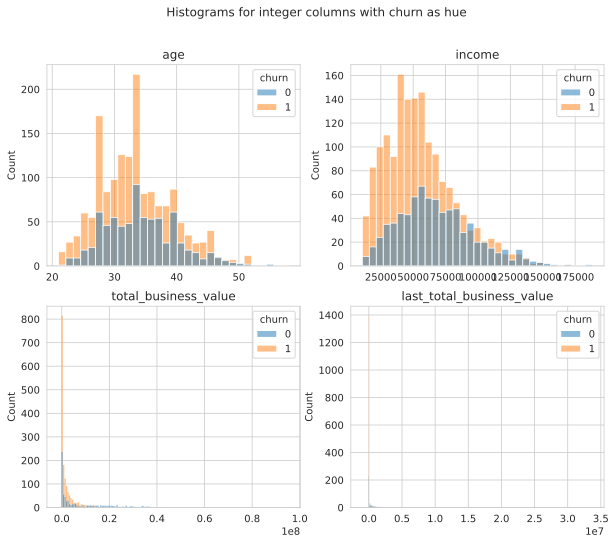

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.2)
fig.suptitle("Histograms for integer columns with churn as hue")

for col, ax in zip(data.select_dtypes(['int']).iloc[:, 1:], axs.ravel()):
    sns.histplot(data, x=col, hue="churn", ax=ax )
    ax.set_title(col)
    ax.set_xlabel('')


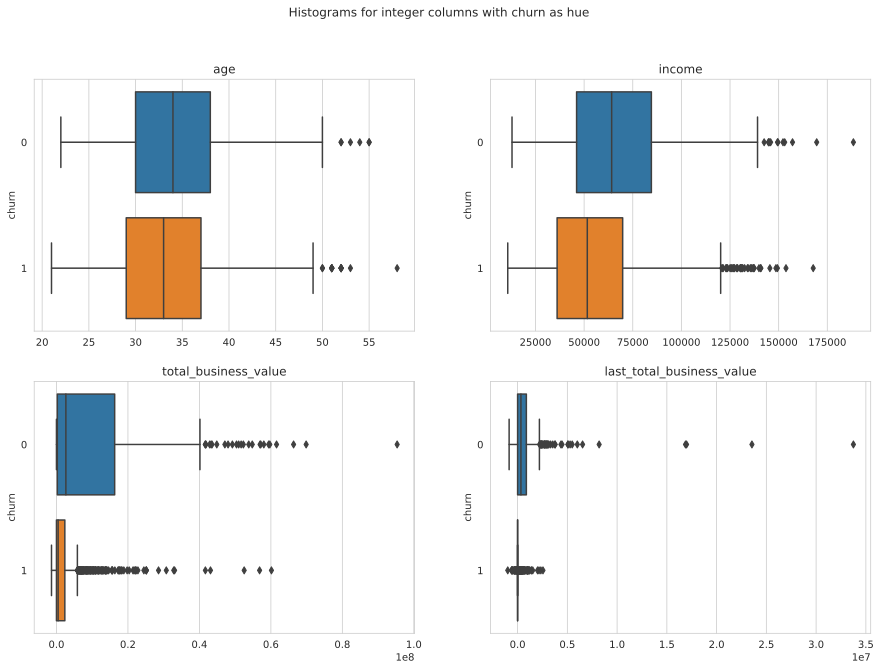

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.2)
fig.suptitle("Histograms for integer columns with churn as hue")

for col, ax in zip(data.select_dtypes(['int']).iloc[:, 1:], axs.ravel()):
    sns.boxplot(data, x=col, y="churn", ax=ax )
    ax.set_title(col)
    ax.set_xlabel('')


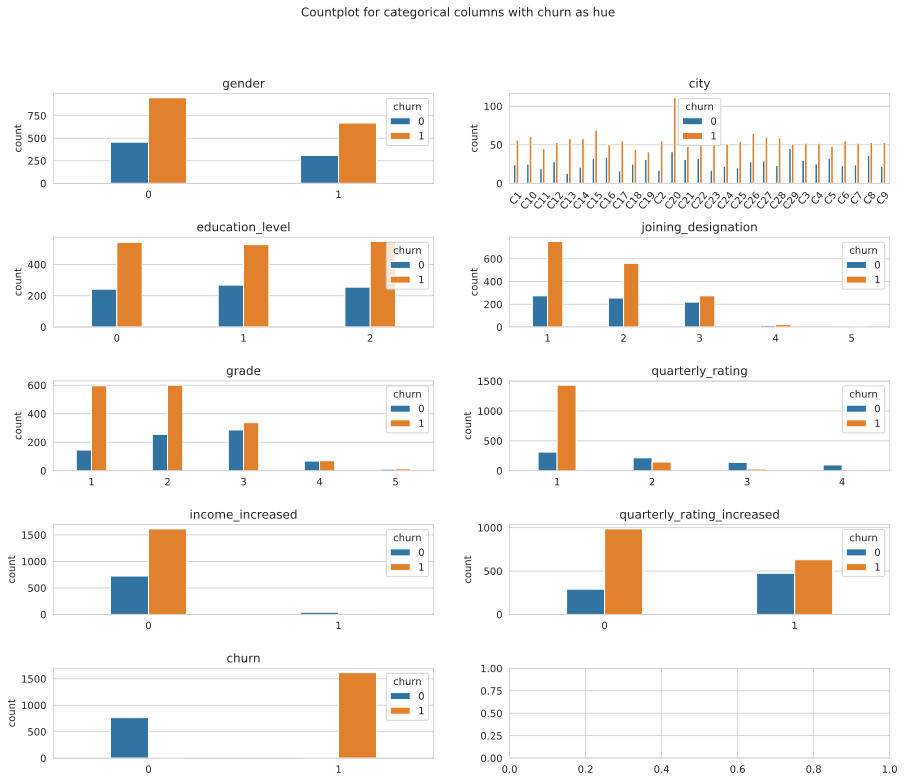

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("Countplot for categorical columns with churn as hue")

for col, ax in zip(data.select_dtypes(['category']), axs.ravel()):
    sns.countplot(data, x=col, hue="churn", width=.4, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')

    if col == "city": ax.set_xticklabels(ax.get_xticklabels(), rotation = 50)


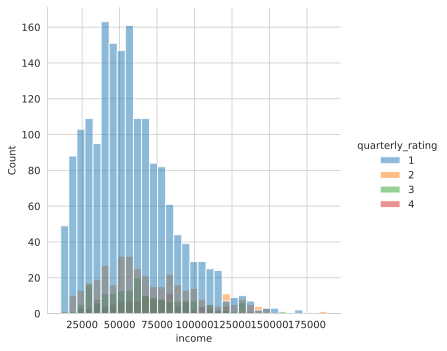

In [ ]:
sns.displot(data, x="income", hue="quarterly_rating")

<Axes: xlabel='gender', ylabel='count'>

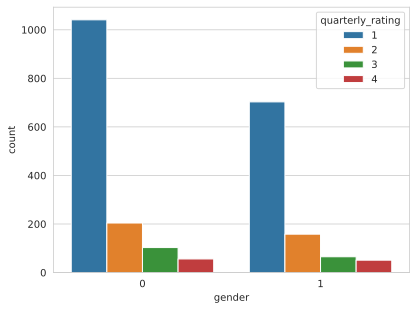

In [ ]:
sns.countplot(data, x="gender", hue="quarterly_rating")

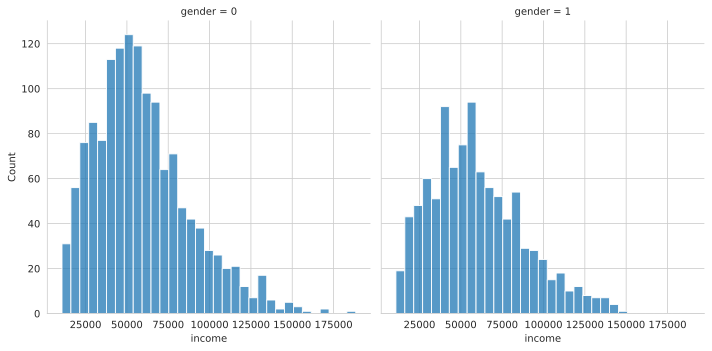

In [ ]:
sns.displot(data, x="income",col="gender")

<Axes: >

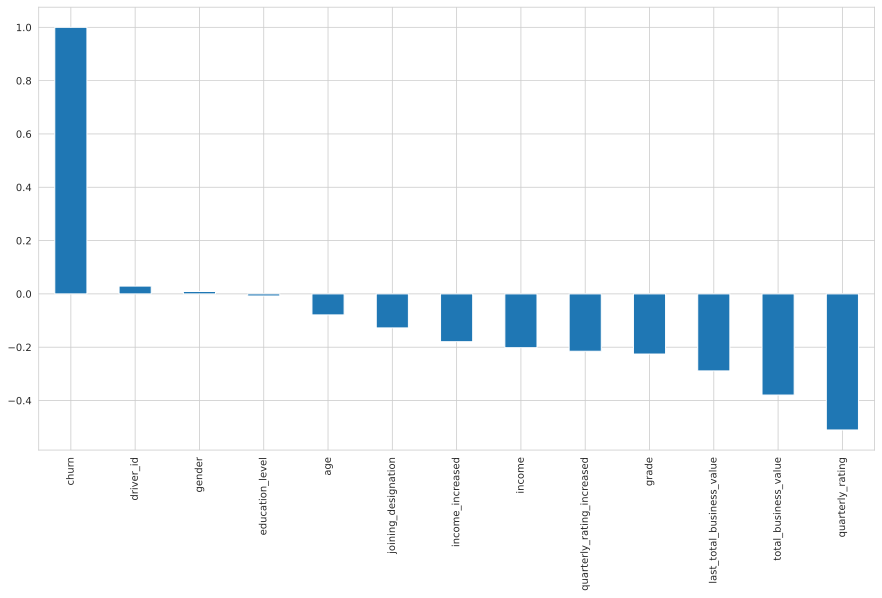

In [ ]:
plt.figure(figsize=(15,8))
agg_df.select_dtypes(include=["int" ]).corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
data.columns

Index(['driver_id', 'reporting_date', 'age', 'gender', 'city',
       'education_level', 'income', 'dateofjoining', 'lastworkingdate',
       'joining_designation', 'grade', 'total_business_value',
       'last_total_business_value', 'quarterly_rating', 'income_increased',
       'quarterly_rating_increased', 'churn', 'dateofjoining_ordinal',
       'reporting_date_ordinal'],
      dtype='object')

In [ ]:
## Checking count of drivers who left

# df.groupby("driver_id").lastworkingdate.apply(lambda x: x.notna().sum()).value_counts()
agg_df.churn.value_counts()

1    1616
0     765
Name: churn, dtype: int64

## visualization of decision tree


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str("iris_tree.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

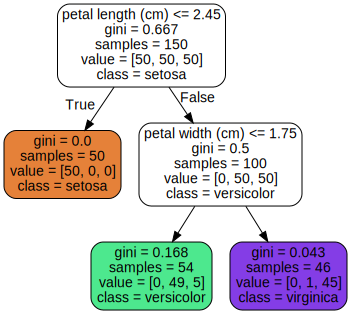

In [ ]:
from graphviz import Source

Source.from_file("iris_tree.dot")

In [ ]:
# extra code
!dot -Tpng {"iris_tree.dot"} -o {"iris_tree.png"}